<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:250%;text-align:center;border-radius:50px 50px;overflow:hidden;border-style:solid;border-width:1.8px;border-color:#FEFBE9;"><b> Image Similarity - Open CV </b></p> 

<div style="float:center;margin-left:10px;max-width:250%;">

<img src ='https://d.newsweek.com/en/full/1944300/two-cats.jpg?w=790&f=77df387820494283488539300491b081'>

</div>

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>1.1 About SSIM ?</b></p>
</div>

> * SSIM that **Structural Similarity Index Measure** that keep the image **visible structure** fit even if color conversion process 
> * SSIM is used as a **method /metric to measure the similarity between two given images**

<div style="color:white;display:fill;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>1.2 SSIM Application ?</b></p>
</div>

> * Object Detection
> * Object Recognision
> * Symentric Segmention
> * Instance Based Segmentation

<p style ='font-family:Lucida Console; text-align:left; color: red;font-size:18px'> Libraries: </p>

In [2]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# Define Function of MSE
def mean_squred_error(image01, image02):
    error = np.sum((image01.astype('float')- image02.astype('float'))*2)
    error = error/float(image01.shape[0] * image02.shape[1])
    return error

def image_comparision(image01, image02):
    m = mean_squred_error(image01, image02)
    s = ssim (image01, image02)
    print("Mean Squred Error is: {}\nStructural Similarity Index is: {}".format(m, s))

<p style= "background-color:#FEF999;font-family:Georgia;color:#000000;font-size:150%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#000000;"><b> Read Image </b></p> 

In [4]:
image01 = cv2.imread("../input/catimages/CatImageA/Cat.jpg")
image02 = cv2.imread("../input/catimages/CatImageB/CatB.jpg")

In [5]:
if image01 is None: 
    print("Failed to load image01")
else:
    print("Image 01 load successfully")
    

Image 01 load successfully


<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:150%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b> CVT Color Conversion </b></p> 

In [6]:
image01 = cv2.cvtColor(image01, cv2.COLOR_BGR2GRAY)
image02 = cv2.cvtColor(image02, cv2.COLOR_BGR2GRAY)

In [7]:
if image02 is None:
    print ("Failed to load Image02")
else:
    print("Image 02 loaded Successfully")

Image 02 loaded Successfully


In [8]:
# print("Image Comparision: \n", image_comparision(image01, image01))
print("Image01")
image_comparision(image01, image01)

Image01
Mean Squred Error is: 0.0
Structural Similarity Index is: 1.0


## Result Analsys:
> * In case of same image, MSE & SSIM will be 0 & 1 respectively

In [9]:
image01.shape

(183, 276)

In [10]:
image01.shape  # Row & Columns [if 182, 251, 125 - row: col: color channel]

(183, 276)

In [11]:
image01.shape[1::-1] # Give reverse or rotation infom, this output need to devide for array

(276, 183)

In [12]:
# image01.shape[1::-1]/2  # tuple is immutable, need to do this np.array, that will allow to do the devision
# why divided by 2 ? to get image center point, 138 is center point of 276 while 91.5 is center point of 183
# We do the center position for rotation 
np.array(image01.shape[1::-1]) / 2   #rotate the image (change in height & width), we are getting array by dividing the image

array([138. ,  91.5])

<p style= "background-color:brown;font-family:Georgia;color:#FEFBE9;font-size:150%;text-align:center;border-radius:50px 50px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b> Image Augmentation </b></p> 

In [13]:
tuple(np.array(image01.shape[1::-1])/2)  # This tuple conversion will pass to image_center

(138.0, 91.5)

> * Augmentation is because of single image
> * After augmentation we will have a different image, what will be helpful for comparision (before & after augementation)
> * Augmentation wasn't mendatory if we do have two different image in our loaded data
> * Generally ssim takes two different image for its operation
> * Augmentation is not mendatory; if from the begining we had two different image


In [14]:
image_angle = 45
image_center = tuple(np.array(image01.shape[1::-1])/2)
image_rotation = cv2.getRotationMatrix2D(image_center, image_angle,1.0) # For rotation, first need to find out image center with angle
imageWarp = cv2.warpAffine(image01, image_rotation, image01.shape[1::-1], flags = cv2.INTER_LINEAR) 

In [15]:
imageWarp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Code Narration
> * Image Angle 45 degree, rotation
> * Scaling method is used for rotation that is ( 0.0, 1.0, 2.0); 1.0 applied here
> * WrapAffine: Firt original image to be sent in warpAffine, then rotation & its shape. Merging image in a frame, holding an image in a frame. So that it dont cross the fram
> * Flag: Tagging value,inter polation/ extra polation. there are no of ways e.g Inter_Linear (By linear Relationship). What kind of approach to be applied in this frame
> * Flag: Since two images taken, how to be present these two image in a frame. 
> * By Linear Interporation Relationship: There are two approach e.g linearity & non-linearity. By Linear Interpolation is nothing but re-sampling method, its works like distance weighted average, weighted average like how frequently a pixel repeat, like in a frame if we try to see an unique pixel value we could notice some pixel like 10, 15, 23 comes many times, then it so the weighted average out of the repeated pixel & get a single new pixel for all repeatation
> * Pixel : Its show like ractangle with four different points, so By linear interpolation will convert this four pixed into a sigle pixel value by weight average method

# Saving the Augmented Image

In [16]:
cv2.imwrite("../working/AugmentedImage.jpg",imageWarp) # path/naming the image.format, warp ; in kaggle image must be saved in working directory

True

## Reading the Augmented Saved Image

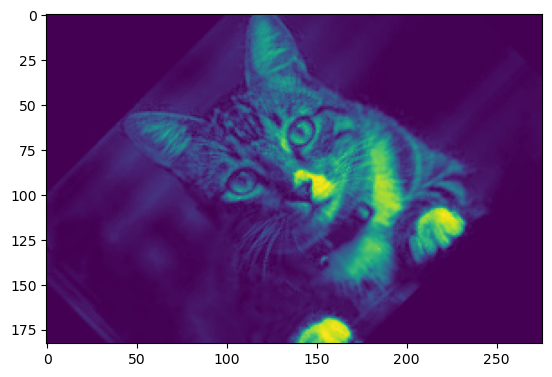

In [17]:
import matplotlib.pyplot as plt
img = plt.imread("../working/AugmentedImage.jpg") # Read 
plt.imshow(img)                                   # Show
plt.show()

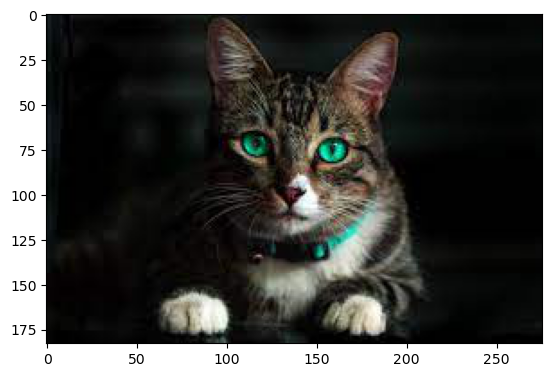

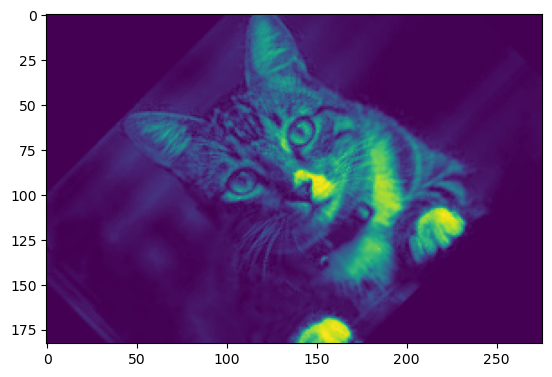

In [18]:
import matplotlib.pyplot as plt
img = plt.imread("../working/AugmentedImage.jpg")
img2 = plt.imread("../input/catimages/CatImageB/CatB.jpg")
plt.imshow(img2)
plt.show()
plt.imshow(img)                                   
plt.show()

In [19]:
# Read & Write Image by OpenCv
# img3 = cv2.imread("../working/AugmentedImage.jpg")
# cv2.imshow("image01",img3)

# Verify Image Similarity

In [20]:
img = cv2.imread("../working/AugmentedImage.jpg")
img2 = cv2.imread("../input/catimages/CatImageB/CatB.jpg")

image01 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image02 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

image_comparision(image01, image02)


Mean Squred Error is: -5.571473825928566
Structural Similarity Index is: 0.26258447392084333


### Result Analysis:
> * MSE is : -5.57
> * SSIM: 26 % as we have do some rotation over the same image, similarity varies 26%
> * This 26% may improve if we could do more tuning over that e.g noise remover, changing 'Flags' etc. Result may varies if the flage changes e.g inter linear/ nearest
> * Reason for Error, when rotate over original image, see there are some extra zeros lies in the rotate image corners, since its BRG, it cannot understand properly, where max portion is black, see the imageWarp you will find maxium is ZEROS!

### Questions:
> * Negative MSE

### More Application for Experiments:
> * Change Flag
> * Image Resize

# Average Blur - Image

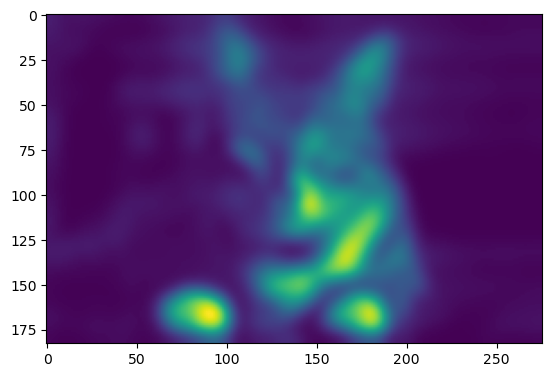

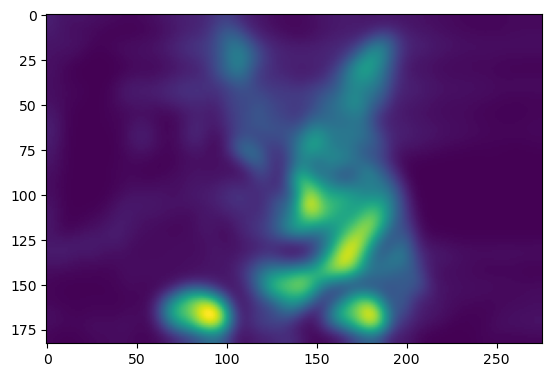

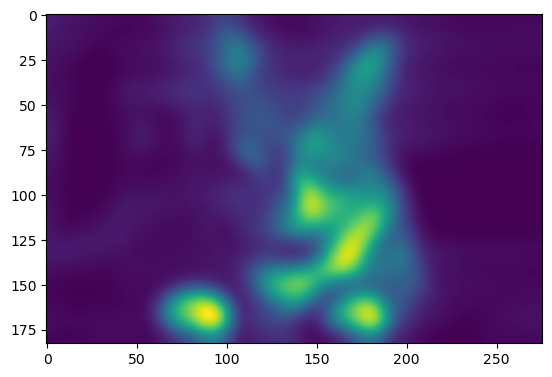

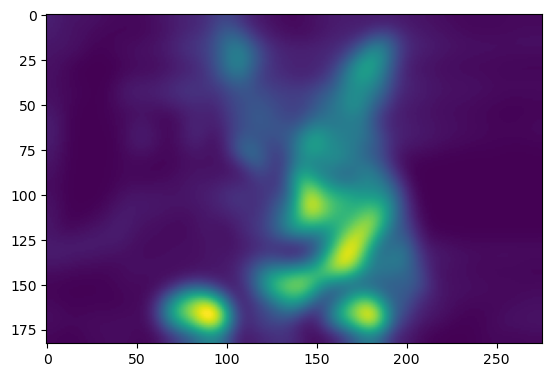

In [35]:
image01 = cv2.blur(image02, (3,3))  # The image average value must be odd with equal pair
image02 = cv2.blur(image02, (7,7))
image03 = cv2.blur(image02, (9,9))
image04 = cv2.blur(image02, (11,11))

plt.imshow(image01)
plt.show()
plt.imshow(image02)
plt.show()
plt.imshow(image03)
plt.show()
plt.imshow(image04)
plt.show()

In [25]:
# cv2.imshow("Image", image01)
# cv2.imshow("Image", image02)
# cv2.imshow("Image", image03)
# cv2.imshow("Image", image04)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Gaussian Blur

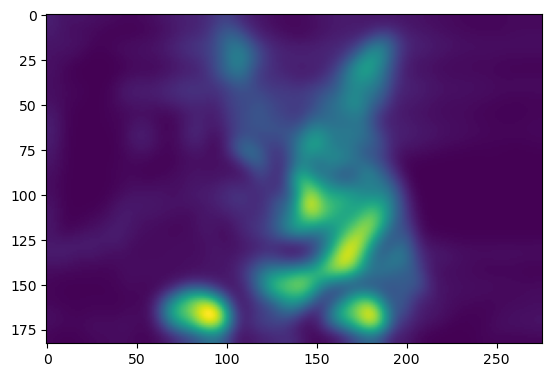

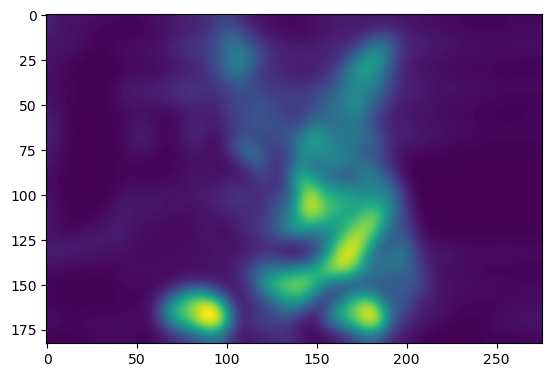

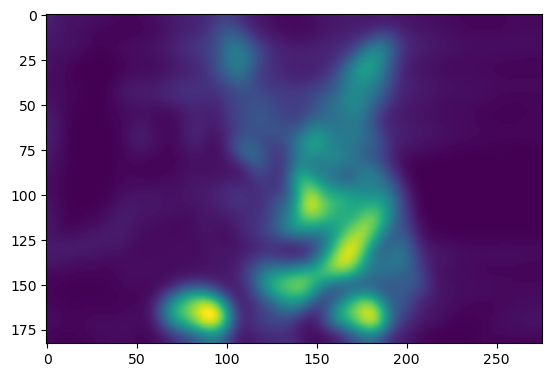

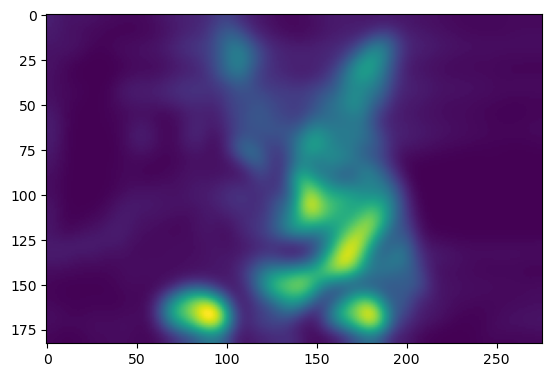

In [37]:
image01 = cv2.GaussianBlur(image02, (3,3),0)
image02 = cv2.GaussianBlur(image02, (5,5),0)
image03 = cv2.GaussianBlur(image02, (7,7),0)
image04 = cv2.GaussianBlur(image02, (9,9),0)

plt.imshow(image01)
plt.show()
plt.imshow(image02)
plt.show()
plt.imshow(image03)
plt.show()
plt.imshow(image04)
plt.show()

# Median Blur

 > * In case of Median Blur, we need to define the median range
 > * Median blur takes median range value to blue the image

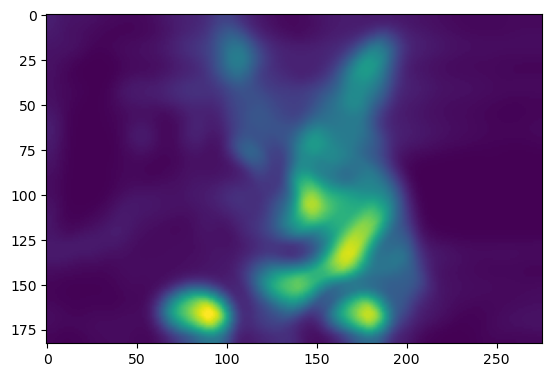

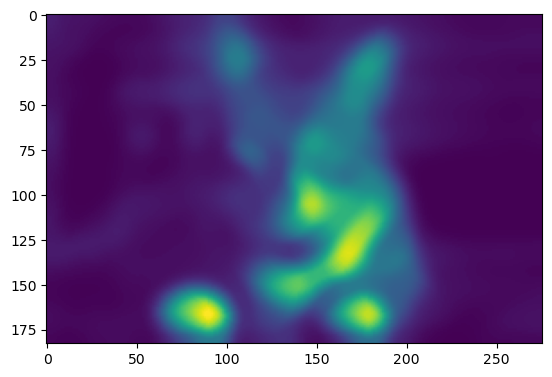

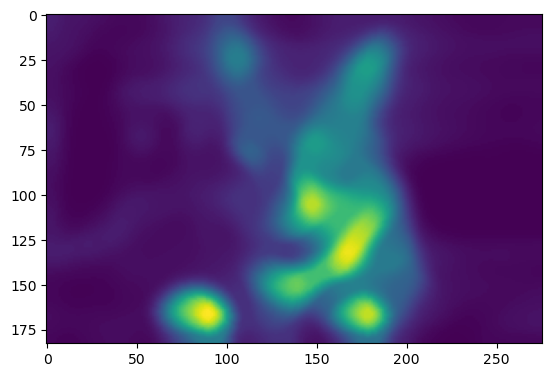

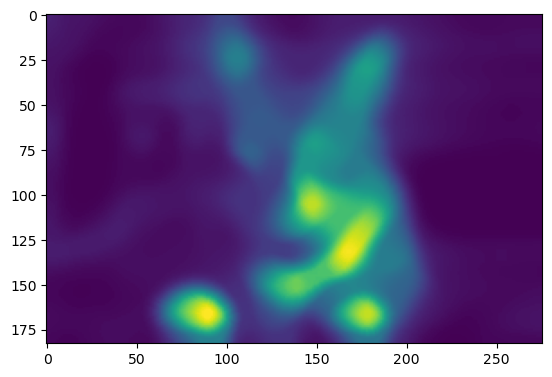

In [40]:
image01 = cv2.medianBlur(image02,3)
image02 = cv2.medianBlur(image02,7)
image03 = cv2.medianBlur(image02,9)
image04 = cv2.medianBlur(image02,11)

plt.imshow(image01)
plt.show()
plt.imshow(image02)
plt.show()
plt.imshow(image03)
plt.show()
plt.imshow(image04)
plt.show()

## Blur Concept:
> * GaussinBlur: Blur the image by normalized values / Normal Distribution or Standard Normal Distribution
> * MedianBlur: Blur the image by Median values, it will take the median value of all pixel
> * AverageBlue: Blur the image by Average values, it will take the average value of all pixel

> * Objective of Blur:: 
> *1. Smoothness Image
> *2. Remove Noise or removing reflecting objects
> *3. Its helpful for Object Detection


## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Thanks for reading! Please feel free to provide suggestions or feedbacks :)</span></center>**